In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [26]:
df=pd.read_csv('Amazon Sale Report.csv')
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,NaN,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship,NaN,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN,NaN,NaN


In [7]:
df.shape

(128976, 21)

In [10]:
df.tail()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
128971,128970,406-6001380-7673107,05-31-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,517.0,HYDERABAD,TELANGANA,500013.0,IN,False,NaN,NaN,NaN
128972,128971,402-9551604-7544318,05-31-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,M,Shipped,...,INR,999.0,GURUGRAM,HARYANA,122004.0,IN,False,NaN,NaN,NaN
128973,128972,407-9547469-3152358,05-31-22,Shipped,Amazon,Amazon.in,Expedited,Blazzer,XXL,Shipped,...,INR,690.0,HYDERABAD,TELANGANA,500049.0,IN,False,NaN,NaN,NaN
128974,128973,402-6184140-0545956,05-31-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,XS,Shipped,...,INR,1199.0,Halol,Gujarat,389350.0,IN,False,NaN,NaN,NaN
128975,128974,408-7436540-8728312,05-31-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,S,Shipped,...,INR,696.0,Raipur,CHHATTISGARH,492014.0,IN,False,NaN,NaN,NaN


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128976 entries, 0 to 128975
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128976 non-null  int64  
 1   Order ID            128976 non-null  object 
 2   Date                128976 non-null  object 
 3   Status              128976 non-null  object 
 4   Fulfilment          128976 non-null  object 
 5   Sales Channel       128976 non-null  object 
 6   ship-service-level  128976 non-null  object 
 7   Category            128976 non-null  object 
 8   Size                128976 non-null  object 
 9   Courier Status      128976 non-null  object 
 10  Qty                 128976 non-null  int64  
 11  currency            121176 non-null  object 
 12  Amount              121176 non-null  float64
 13  ship-city           128941 non-null  object 
 14  ship-state          128941 non-null  object 
 15  ship-postal-code    128941 non-nul

In [28]:
# dropping the null data column
df1=df.drop(['New','PendingS'],axis=1)
df1


,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,1,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128971,128970,406-6001380-7673107,05-31-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,1,INR,517.00,HYDERABAD,TELANGANA,500013.0,IN,False,NaN
128972,128971,402-9551604-7544318,05-31-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,M,Shipped,1,INR,999.00,GURUGRAM,HARYANA,122004.0,IN,False,NaN
128973,128972,407-9547469-3152358,05-31-22,Shipped,Amazon,Amazon.in,Expedited,Blazzer,XXL,Shipped,1,INR,690.00,HYDERABAD,TELANGANA,500049.0,IN,False,NaN
128974,128973,402-6184140-0545956,05-31-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,XS,Shipped,1,INR,1199.00,Halol,Gujarat,389350.0,IN,False,NaN


In [29]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128976 entries, 0 to 128975
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128976 non-null  int64  
 1   Order ID            128976 non-null  object 
 2   Date                128976 non-null  object 
 3   Status              128976 non-null  object 
 4   Fulfilment          128976 non-null  object 
 5   Sales Channel       128976 non-null  object 
 6   ship-service-level  128976 non-null  object 
 7   Category            128976 non-null  object 
 8   Size                128976 non-null  object 
 9   Courier Status      128976 non-null  object 
 10  Qty                 128976 non-null  int64  
 11  currency            121176 non-null  object 
 12  Amount              121176 non-null  float64
 13  ship-city           128941 non-null  object 
 14  ship-state          128941 non-null  object 
 15  ship-postal-code    128941 non-nul

In [33]:
pd.isnull(df1).sum()

index                     0
Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Category                  0
Size                      0
Courier Status            0
Qty                       0
currency               7800
Amount                 7800
ship-city                35
ship-state               35
ship-postal-code         35
ship-country             35
B2B                       0
fulfilled-by          89713
dtype: int64

In [34]:
df1.shape

(128976, 19)

In [159]:
#removing the null data
df1.dropna(inplace=True)
df1

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,0,INR,647.62,MUMBAI,MAHARASHTRA,400081,IN,False,Easy Ship
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085,IN,False,Easy Ship
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008,IN,False,Easy Ship
7,7,406-7807733-3785945,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,S,Shipped,1,INR,399.00,HYDERABAD,TELANGANA,500032,IN,False,Easy Ship
12,12,405-5513694-8146768,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,XS,Shipped,1,INR,399.00,Amravati.,MAHARASHTRA,444606,IN,False,Easy Ship
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128875,128874,405-4724097-1016369,06-01-2022,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,T-shirt,S,Shipped,1,INR,854.00,ALLUR,ANDHRA PRADESH,524315,IN,False,Easy Ship
128876,128875,403-9524128-9243508,06-01-2022,Cancelled,Merchant,Amazon.in,Standard,Blazzer,XL,On the Way,0,INR,734.29,Barabanki,UTTAR PRADESH,225001,IN,False,Easy Ship
128888,128887,405-6493630-8542756,05-31-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Trousers,M,Shipped,1,INR,518.00,NOIDA,UTTAR PRADESH,201301,IN,False,Easy Ship
128891,128890,407-0116398-1810752,05-31-22,Cancelled,Merchant,Amazon.in,Standard,Wallet,Free,On the Way,0,INR,398.10,MADURAI,TAMIL NADU,625007,IN,False,Easy Ship


In [40]:
df1.shape

(37514, 19)

In [41]:
df1.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Qty',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B', 'fulfilled-by'],
      dtype='object')

In [47]:
df1['ship-postal-code']=df1['ship-postal-code'].astype('int')

In [48]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37514 entries, 0 to 128892
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               37514 non-null  int64  
 1   Order ID            37514 non-null  object 
 2   Date                37514 non-null  object 
 3   Status              37514 non-null  object 
 4   Fulfilment          37514 non-null  object 
 5   Sales Channel       37514 non-null  object 
 6   ship-service-level  37514 non-null  object 
 7   Category            37514 non-null  object 
 8   Size                37514 non-null  object 
 9   Courier Status      37514 non-null  object 
 10  Qty                 37514 non-null  int64  
 11  currency            37514 non-null  object 
 12  Amount              37514 non-null  float64
 13  ship-city           37514 non-null  object 
 14  ship-state          37514 non-null  object 
 15  ship-postal-code    37514 non-null  int32  
 16  ship-cou

In [49]:
df1.describe()

,index,Qty,Amount,ship-postal-code
count,37514.000000,37514.000000,37514.000000,37514.000000
mean,60953.809858,0.867383,646.553960,463291.552754
std,36844.853039,0.354160,279.952414,194550.425637
min,0.000000,0.000000,0.000000,110001.000000
25%,27235.250000,1.000000,458.000000,370465.000000
50%,63470.500000,1.000000,629.000000,500019.000000
75%,91790.750000,1.000000,771.000000,600042.000000
max,128891.000000,5.000000,5495.000000,989898.000000


In [50]:
df1.describe(include='object')

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,currency,ship-city,ship-state,ship-country,fulfilled-by
count,37514,37514,37514,37514,37514,37514,37514,37514,37514,37514,37514,37514,37514,37514
unique,34664,91,11,1,1,1,8,11,3,1,4698,58,1,1
top,171-5057375-2831560,04-25-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,T-shirt,M,Shipped,INR,BENGALURU,MAHARASHTRA,IN,Easy Ship
freq,12,697,28741,37514,37514,37514,14062,6806,31859,37514,2839,6236,37514,37514


In [51]:
#DATA VISUALIZATION

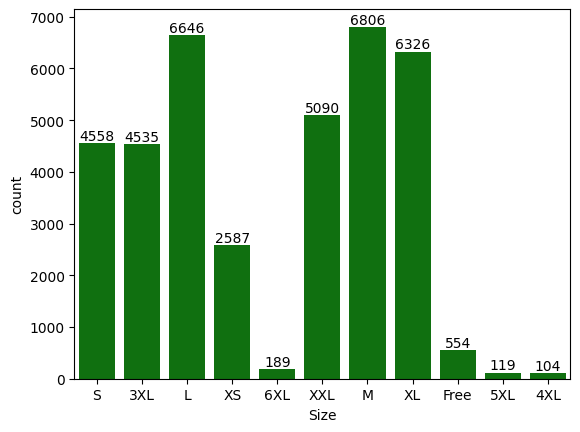

In [86]:
x1=sns.countplot(data=df1,x='Size',color='g',legend=True)
x1.bar_label(x1.containers[0])
plt.show()

In [63]:
#conclusion: most people buy M size.

In [69]:
gb=df1.groupby('Size').agg({'Qty':'sum','Amount':'sum'})
gb

,Qty,Amount
Size,,
3XL,3972,2888042.30
4XL,93,80830.64
5XL,104,90606.63
6XL,170,141404.33
Free,467,350069.60
L,5795,4299821.03
M,5905,4512571.13
S,3896,3050876.94
XL,5481,3970514.38


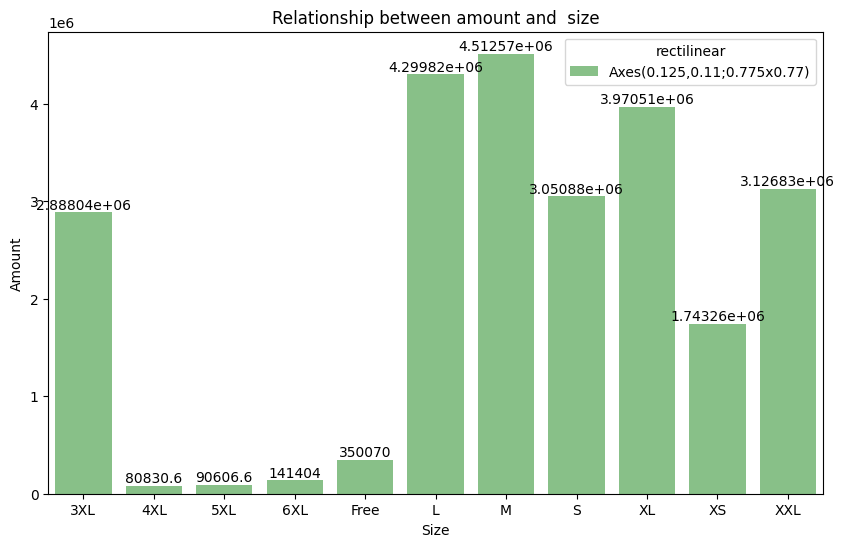

In [95]:
plt.figure(figsize=(10,6))
x2=sns.barplot(x='Size',y='Amount',hue=x2,legend=True,data=gb,palette='Accent')
x2.bar_label(x2.containers[0])
plt.title('Relationship between amount and  size')
plt.show()

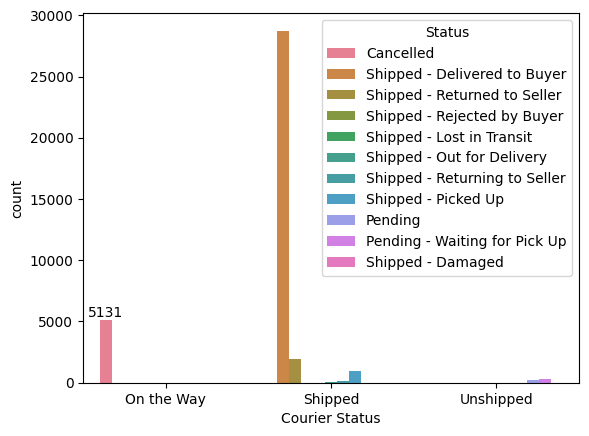

In [93]:
x3=sns.countplot(data=df1,x='Courier Status',hue='Status')
x3.bar_label(x3.containers[0])
plt.show()

In [96]:
#checking B2B data by using pie chart

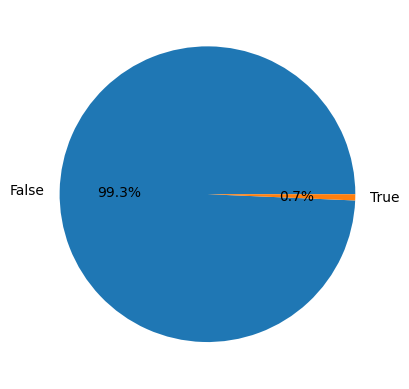

In [103]:
B2B_check=df['B2B'].value_counts()
plt.pie(B2B_check,labels=B2B_check.index,autopct='%1.1f%%')
plt.show()

In [104]:
# from above 99.3% of buyers are retailer

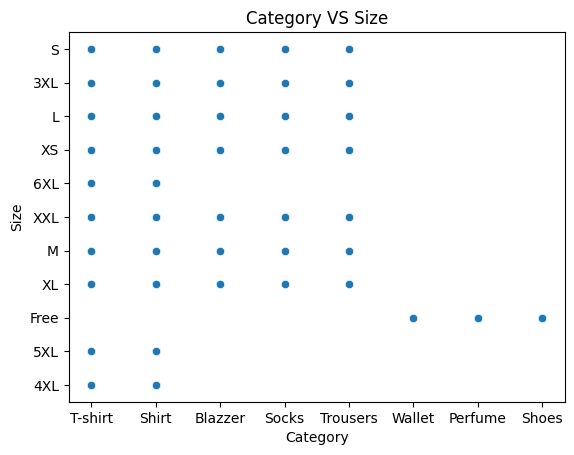

In [112]:
sns.scatterplot(x='Category',y='Size',data=df1)
plt.title('Category VS Size')                
plt.show()

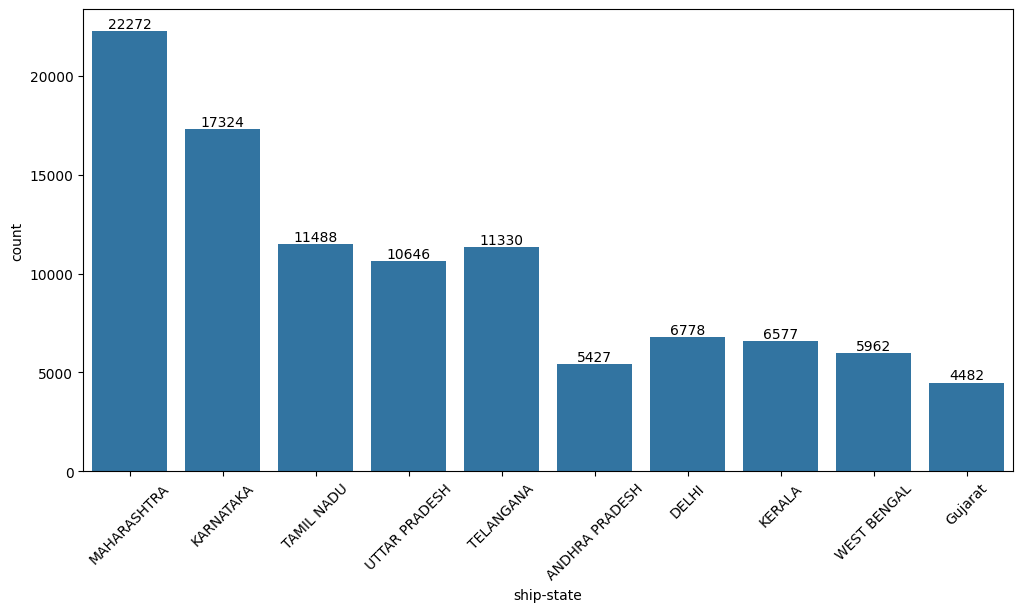

In [128]:
plt.figure(figsize=(12,6))
top_10_state=df['ship-state'].value_counts().head(10)
x4=sns.countplot(x='ship-state',data=df[df['ship-state'].isin(top_10_state.index)])
x4.bar_label(x4.containers[0])
plt.xticks(rotation=45)
plt.show()

In [129]:
# note most of buyers are from maharastra state

In [150]:
gb2=df1.groupby('Category').agg({'Fulfilment':'count','Sales Channel':'count','ship-service-level':'count'})
gb2

,Fulfilment,Sales Channel,ship-service-level
Category,,,
Blazzer,6661,6661,6661
Perfume,295,295,295
Shirt,13595,13595,13595
Shoes,31,31,31
Socks,183,183,183
T-shirt,14062,14062,14062
Trousers,2459,2459,2459
Wallet,228,228,228


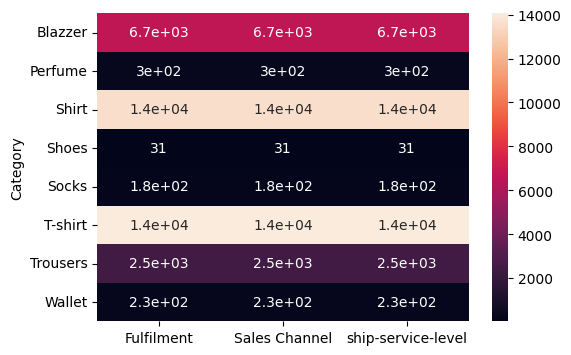

In [151]:
plt.figure(figsize=(6,4))
sns.heatmap(gb2,annot=True)
plt.show()


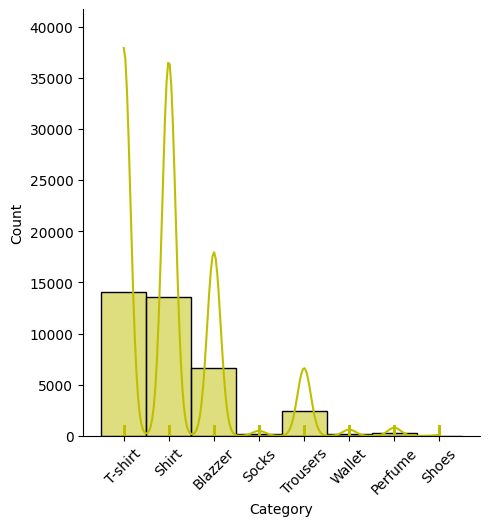

In [149]:
sns.displot(df1['Category'],kde=True,rug=True,color='y')
plt.xticks(rotation=45)
plt.show()

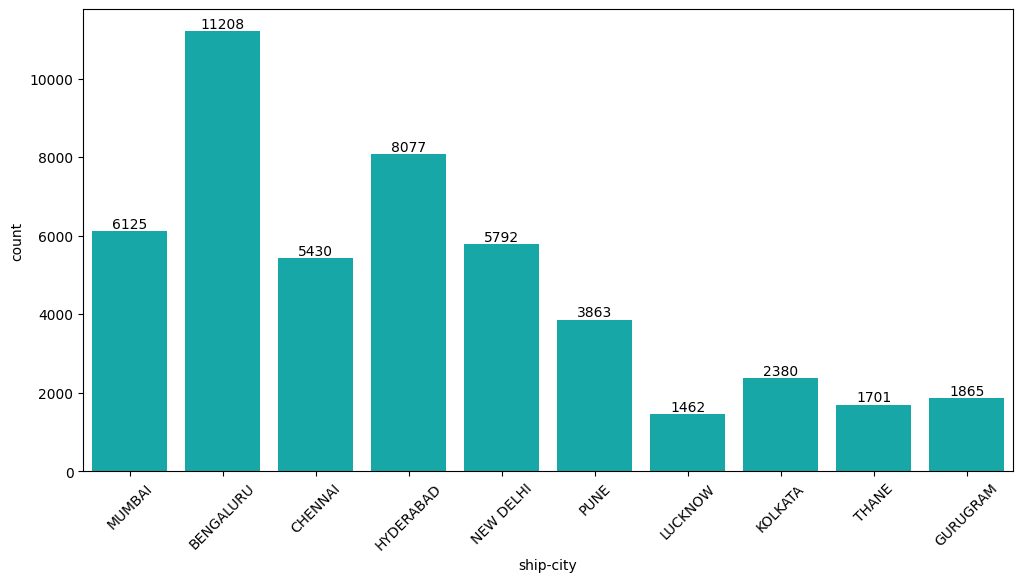

In [166]:
plt.figure(figsize=(12,6))
top_10_city=df['ship-city'].value_counts().head(10)
x4=sns.countplot(x='ship-city',data=df[df['ship-city'].isin(top_10_city.index)],color='c')
x4.bar_label(x4.containers[0])
plt.xticks(rotation=45)
plt.show()

In [ ]:
CONCLUSION:FROM ABOVE WE CONCLUDE THAT THE BUSINESS HAS SIGNIFICANT CUSTOMERS IN MAHARASTRA STATE OF INDIA,fullfil order through amazon ,have high demand for T-Shirt and M size is most preferred.